In [19]:
import vk  

In [20]:
token = "63e163d363e163d363e163d3af63929ca4663e163e163d33c849b30d5a14a8ec695bb76"  # Сервисный ключ доступа
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)

In [21]:
personal_token = "694665bc9f22c8045de619f7b0b7221abeacf1946fa2a4b15e22b5537b1d4bda98761659cc5f127a86d3e"  # Персональный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=personal_token)  # Авторизация
vk_personal_api = vk.API(session)  # Авторизация

In [22]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [23]:
members = get_members("afishapicnic")
                      
members[:10]
                      
                 

[{'id': 34,
  'first_name': 'Tatyana',
  'last_name': 'Plutalova',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 1,
  'domain': 'id34',
  'bdate': '2.6',
  'city': {'id': 2, 'title': 'Saint Petersburg'},
  'country': {'id': 1, 'title': 'Russia'}},
 {'id': 1100,
  'first_name': 'Artur',
  'last_name': 'Lomaraynen',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 2,
  'domain': 'id1100',
  'bdate': '21.11',
  'city': {'id': 221, 'title': 'Turku'},
  'country': {'id': 207, 'title': 'Finland'}},
 {'id': 1181,
  'first_name': 'Dusya',
  'last_name': 'Gorbovskaya',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 1,
  'domain': 'dusia',
  'bdate': '7.4',
  'city': {'id': 2, 'title': 'Saint Petersburg'},
  'country': {'id': 1, 'title': 'Russia'}},
 {'id': 1192,
  'first_name': 'Mikhail',
  'last_name': 'Morozov',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 2,
  'domain': 'mishka.morozov',
  'bdate': '8.1',
  'city': {'id': 2, 'title': 'Sain

In [24]:
len(members)

39642

In [25]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # находим айди участника
            first_name = member["first_name"] # находим имя учатника
            last_name = member["last_name"] # находим фамилию учатника
            
            sex = member["sex"] # находим пол учатника (1 или 2)
            if int(sex) == 1:  # если пол это 1 
                sex = "F"  # обозначем женский пол как F
            elif int(sex) == 2:  # если пол это 2 
                sex = "M" # обозначем мужской пол как F
            else:  # если есть другой какой-то пол
                sex = "-"  # скорее всего нет, поэтому ставим прочерк
                
            bdate = member.get('bdate', "-")   # находим день рождения учатника
            if len(bdate.split(".")) == 3:  # нам нужен только год, если он есть
                bdate = bdate.split(".")[-1]  # то сохраняем год
            else:  # если год не указан, то возраст участника мы не узнаем
                bdate = "-"  # поэтому прочерк
                
            city = member.get('city', {}).get("title", "-")  # находим город участника
            country = member.get('country', {}).get("title", "-")  # находим страну участника
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # сохраняем информацию в файл

In [26]:
save_members_to_file ("picnicafishi.saved_members.tsv", members)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import pandas as pd

df = pd.read_csv("picnicafishi.saved_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [29]:
df = df[df['name'] != 'DELETED']

In [30]:
df.head(10)

id     name      surname sex birth              city  country
0    34,  Tatyana    Plutalova   F     -  Saint Petersburg   Russia
1  1100,    Artur   Lomaraynen   M     -             Turku  Finland
2  1181,    Dusya  Gorbovskaya   F     -  Saint Petersburg   Russia
3  1192,  Mikhail      Morozov   M     -  Saint Petersburg   Russia
4  1242,   Philip    Denisenko   M  1988  Saint Petersburg   Russia
5  1389,     Ivan    Bezborody   M  1986   Nizhny Novgorod   Russia
6  1422,    Masha      Egorova   F     -  Saint Petersburg   Russia
7  1434,      Iya    Bakuradze   F     -                 -   Russia
8  1570,     Anna    Bashilova   F     -  Saint Petersburg   Russia
9  1607,     Olya     Smirnova   F     -  Saint Petersburg   Russia

In [31]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Moscow              13234
Saint Petersburg     3367
Nizhny Novgorod       495
Yekaterinburg         353
Voronezh              299
Kazan                 291
Samara                278
Rostov-on-Don         250
Krasnodar             220
Minsk                 209
Perm                  206
Novosibirsk           176
Kyiv                  176
Tula                  172
Yaroslavl             149
Ryazan                146
Ufa                   135
Volgograd             124
Chelyabinsk           121
Tver                  116
Name: city, dtype: int64


In [32]:
 39646 - 16607

23039

In [33]:
13238 + 3369

16607

In [ ]:
#боль msk + spb 13259   prov 8267

In [ ]:
# ПаркЛайв msk + spb 25946 prov 24968

In [ ]:
# Боско sk + spb 8901 prov 6358

In [36]:
import numpy as np
import matplotlib.pyplot as plt


In [37]:
barWidth = 0.25


In [38]:
bars1 = [16609, 13259 , 25946, 8901]
bars2 = [10367, 8267, 24968, 6358 ]


In [39]:
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


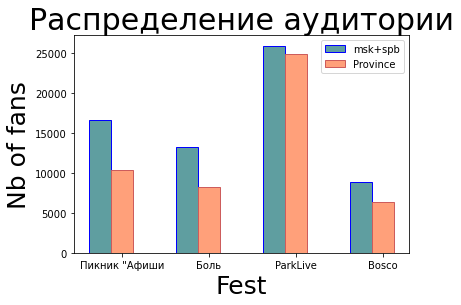

In [40]:
plt.bar(r1, bars1, color='cadetblue', width=barWidth, edgecolor='blue', label='msk+spb')
plt.bar(r2, bars2, color='lightsalmon', width=barWidth, edgecolor='indianred', label='Province')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Пикник "Афиши', 'Боль', 'ParkLive', 'Bosco'])
plt.title('Распределение аудитории', fontsize=30)
plt.ylabel('Nb of fans', fontsize=25)
plt.xlabel('Fest', fontsize=25)
plt.xticks(rotation=0) # разворачиваем подписи под городами на 90 градусов
plt.legend(loc = 'upper right')
plt.show() # показываем изображение# your code hereplt.legend()



In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
import pandas as pd


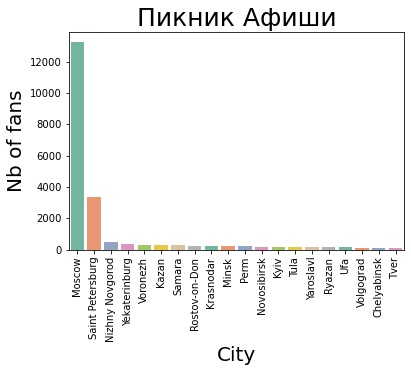

In [43]:
sns.barplot(city_count.index, city_count.values, palette='Set2') # рисуем график, выбираем цвет
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.title('Пикник Афиши', fontsize=25)
plt.ylabel('Nb of fans', fontsize=20)
plt.xlabel('City', fontsize=20)
plt.show() 
# показываем изображение

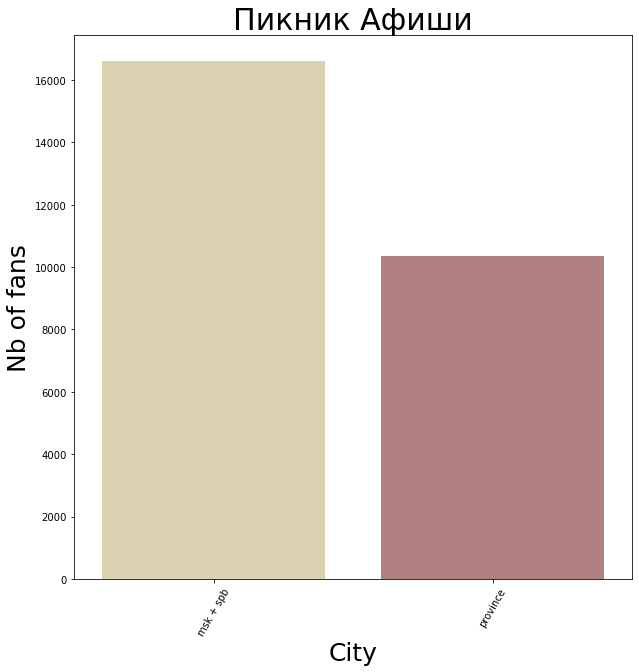

In [192]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Saint Petersburg')] = "msk + spb"
df.loc[(df['city'] != "msk + spb") & (df['city'] != "-")] = "province"

city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
plt.figure(figsize=(10,10)) #размер картинки
ax = sns.barplot(city_count.index,city_count.values, palette='pink_r') # рисуем график, выбираем цвет
plt.title('Пикник Афиши', fontsize=30)
plt.ylabel('Nb of fans', fontsize=25)
plt.xlabel('City', fontsize=25)
plt.xticks(rotation=60) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение# your code here

In [45]:
with open("../Our_project-main/boscofreshfest.txt", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
    
with open("../Our_project-main/bolbfest_members", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
    
with open("../Our_project-main/picnicafishi.saved_members.tsv", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")

with open("../Our_project-main/parklive_members.tsv", 'r', encoding='utf-8') as f:
    members4 = f.read().split("\n")


In [46]:
members3 = set(members3)
members1 = set(members1)
members2 = set(members2)
members4 = set(members4)

members3.remove("")

In [47]:
united_members = members1.union(members2).union(members3).union(members4)


In [48]:
with open ("united_members.tsv", "w",  encoding='utf-8') as f:
    for i in united_members:
        f.write(i + "\n")

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import pandas as pd



In [51]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

msk + spb    16601
province     10365
Name: city, dtype: int64


In [52]:
intersected_members = members1.intersection(members2).intersection(members3).intersection(members4)


In [53]:
with open("intersected_members.tsv", "w", encoding="utf-8") as w:
    for i in intersected_members:
        w.write(i+"\n")

In [54]:
import pandas as pd

df = pd.read_csv("intersected_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [55]:
df = df[df["name"] != "DELETED"]


In [56]:
df = df[df["name"] != "DELETED"]


In [57]:
df.head(100)


id          name      surname sex birth city country
0     8090090,          Mary   Stepanenko   F     -    -       -
1   245228950,          Gleb  Kudryavtsev   M     -    -       -
4   559929829,           Ann        Nomad   F  2000    -       -
5     2209816,     Anastasia    Filippova   F     -    -       -
6   275745687,  Konchalovsky    Anastasia   F     -    -       -
9   380354715,           All         Fest   M  1973    -       -
11  246310088,        Helena   Bloomquist   F     -    -       -
12  390444756,         Roman   Aynutdinov   M     -    -       -
13   20197498,        Regina       George   F     -    -       -
16  495923691,    Electrojam         Info   M     -    -       -

In [58]:
import pandas as pd

df = pd.read_csv("picnicafishi.saved_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [59]:
df.head(11)


id     name      surname sex birth              city  country
0     34,  Tatyana    Plutalova   F     -  Saint Petersburg   Russia
1   1100,    Artur   Lomaraynen   M     -             Turku  Finland
2   1181,    Dusya  Gorbovskaya   F     -  Saint Petersburg   Russia
3   1192,  Mikhail      Morozov   M     -  Saint Petersburg   Russia
4   1242,   Philip    Denisenko   M  1988  Saint Petersburg   Russia
5   1389,     Ivan    Bezborody   M  1986   Nizhny Novgorod   Russia
6   1422,    Masha      Egorova   F     -  Saint Petersburg   Russia
7   1434,      Iya    Bakuradze   F     -                 -   Russia
8   1570,     Anna    Bashilova   F     -  Saint Petersburg   Russia
9   1607,     Olya     Smirnova   F     -  Saint Petersburg   Russia
10  1635,   Dinara   Kondybaeva   F     -  Saint Petersburg   Russia

In [60]:
with open("../Our_project-main/boscofreshfest.txt", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
    
with open("../Our_project-main/bolbfest_members", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
    
with open("../Our_project-main/picnicafishi.saved_members.tsv", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")

with open("../Our_project-main/parklive_members.tsv", 'r', encoding='utf-8') as f:
    members4 = f.read().split("\n")

In [61]:
members3 = set(members3)
members1 = set(members1)
members2 = set(members2)
members4 = set(members4)

members3.remove("")

In [62]:
len(members1) #bosco

21247

In [63]:
len(members2) #bol

33569

In [64]:
len(members3) #picnic

39648

In [65]:
len(members4) #parklive

77405

In [66]:
united_members = members1.union(members2).union(members3).union(members4)


In [67]:
intersected_bosco_pa= members1.intersection(members3) 

In [68]:
len(intersected_bosco_pa)

3918

In [69]:
intersected_bosco_bol= members1.intersection(members2)

In [70]:
len(intersected_bosco_bol)

1801

In [71]:
intersected_bosco_pl= members1.intersection(members4)

In [77]:
len(intersected_bosco_pl)

176

In [78]:
intersected_pa_pl= members3.intersection(members4) 

In [79]:
len(intersected_pa_pl)

378

In [80]:
intersected_pa_bol= members3.intersection(members2) 

In [81]:
len(intersected_pa_bol)

3513

In [82]:
intersected_pl_bol= members4.intersection(members2) 

In [83]:
len(intersected_pl_bol)

141

In [110]:
intersected_pa_bol_bosco= members3.intersection(members2).intersection(members1)

In [111]:
len(intersected_pa_bol_bosco)

976

In [88]:
!pip install matplotlib-venn

     |████████████████████████████████| 40 kB 588 kB/s eta 0:00:01
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.5-py3-none-any.whl size=32394 sha256=394a897ff996a50f715bdb3e1e798367245d86bd0c8b03434c3a0ee1e2e218e6
  Stored in directory: /Users/milamakaeva/Library/Caches/pip/wheels/86/fa/e0/aaeb803cef64c8857275d094fdc8ef93e0106fe9970f285e66
Successfully built matplotlib-venn


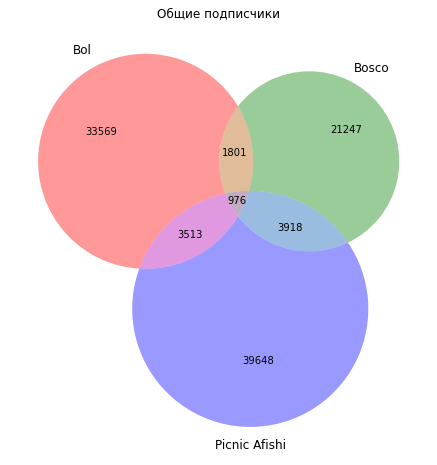

In [153]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(8,8))
venn3(subsets = (33569,21247, 1801, 39648, 3513, 3918, 976), set_labels = ('Bol', 'Bosco', "Picnic Afishi"))
plt.title("Общие подписчики")


plt.show()

In [72]:
import vk


In [73]:
from pymystem3 import Mystem

In [74]:
import re  

In [75]:
token = "63e163d363e163d363e163d3af63929ca4663e163e163d33c849b30d5a14a8ec695bb76"  # Сервисный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)  # Авторизация

In [78]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [79]:
posts = get_posts("afishapicnic")


In [80]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [81]:
posts = get_posts("afishapicnic")
                      
posts[:10]

['Вы все ждете от нас новостей — будет ли Пикник-2020? Отвечаем честно: 8 августа — уже точно нет. Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет. Однако пока просто не знаем, будет ли такая возможность. Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем! Очень скучаем! \nПикник «Афиши»',
 'Набирайтесь сил перед выходными, ведь на вечеринке имени себя вы и бармен, и диджей, и толпа. Мы поможем: 100 лучших музыкальных видео, подобранных командой Пикника "Афиши", уже на канале в Youtube!\n\nhttps://www.youtube.com/watch?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9',
 'Друзья! Анонс Пикника «Афиши» откладывается на некоторое время. Мы делаем все возможное, чтобы лучший фестиваль города прошел в обычном режиме. И чтобы в августе вы по нашей старой традиции танцевали на газонах Коломенского. Будем держать в

In [88]:
def delete_newlines(posts):
    posts = re.sub("\n", " ", posts)
    return posts

In [89]:
posts = [delete_newlines(post) for post in posts]

In [90]:
import re


In [91]:
pattern_link = re.compile(r"[A-z0-9]+[:/\.]+[A-z0-9]+[\./]+[A-z0-9]+[A-z0-9\./]+\b")

In [92]:
def replace_weblinks(posts):
    return re.sub(pattern_link, "WEBLINK", posts)
posts = [replace_weblinks(post) for post in posts] 


In [93]:
posts

['Вы все ждете от нас новостей — будет ли Пикник-2020? Отвечаем честно: 8 августа — уже точно нет. Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет. Однако пока просто не знаем, будет ли такая возможность. Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем! Очень скучаем!  Пикник «Афиши»',
 'Набирайтесь сил перед выходными, ведь на вечеринке имени себя вы и бармен, и диджей, и толпа. Мы поможем: 100 лучших музыкальных видео, подобранных командой Пикника "Афиши", уже на канале в Youtube!  WEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9',
 'Друзья! Анонс Пикника «Афиши» откладывается на некоторое время. Мы делаем все возможное, чтобы лучший фестиваль города прошел в обычном режиме. И чтобы в августе вы по нашей старой традиции танцевали на газонах Коломенского. Будем держать в курсе!  Не поддавайтесь 

In [94]:
pattern_mention = re.compile(r"[\(\[]+[a-z0-9]+\|[A-z0-9 А-я'\/\(\)\"]+[\]()]")

In [95]:
def replace_mentions(posts):
    return re.sub(pattern_mention, "MENTION", posts)

In [96]:
posts = [replace_mentions(post) for post in posts]
print(posts)

['Вы все ждете от нас новостей — будет ли Пикник-2020? Отвечаем честно: 8 августа — уже точно нет. Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет. Однако пока просто не знаем, будет ли такая возможность. Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем! Очень скучаем!  Пикник «Афиши»', 'Набирайтесь сил перед выходными, ведь на вечеринке имени себя вы и бармен, и диджей, и толпа. Мы поможем: 100 лучших музыкальных видео, подобранных командой Пикника "Афиши", уже на канале в Youtube!  WEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9', 'Друзья! Анонс Пикника «Афиши» откладывается на некоторое время. Мы делаем все возможное, чтобы лучший фестиваль города прошел в обычном режиме. И чтобы в августе вы по нашей старой традиции танцевали на газонах Коломенского. Будем держать в курсе!  Не поддавайтесь па

In [97]:
def clean_text(posts):
    posts = re.sub(pattern_link, "WEBLINK", posts)
    posts = re.sub(pattern_mention, "MENTION", posts)
    posts = posts.replace("\n", " ")
    return posts
with open('texts.txt', 'w', encoding="utf-8") as f:
    for post in posts:
        cleaned = clean_text(post)
        f.write(cleaned+"\n")

In [98]:
posts = "".join(posts)

In [100]:
posts

'Вы все ждете от нас новостей — будет ли Пикник-2020? Отвечаем честно: 8 августа — уже точно нет. Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет. Однако пока просто не знаем, будет ли такая возможность. Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем! Очень скучаем!  Пикник «Афиши»Набирайтесь сил перед выходными, ведь на вечеринке имени себя вы и бармен, и диджей, и толпа. Мы поможем: 100 лучших музыкальных видео, подобранных командой Пикника "Афиши", уже на канале в Youtube!  WEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9Друзья! Анонс Пикника «Афиши» откладывается на некоторое время. Мы делаем все возможное, чтобы лучший фестиваль города прошел в обычном режиме. И чтобы в августе вы по нашей старой традиции танцевали на газонах Коломенского. Будем держать в курсе!  Не поддавайтесь панике, бер

In [101]:
words_re = [i.strip() for i in re.split(r"([ \.\?!,]{1,})", posts) if i.strip()] # и это повторяется от 1 до бесконечности раз
print(words_re)

['Вы', 'все', 'ждете', 'от', 'нас', 'новостей', '—', 'будет', 'ли', 'Пикник-2020', '?', 'Отвечаем', 'честно:', '8', 'августа', '—', 'уже', 'точно', 'нет', '.', 'Мы', 'мечтаем', 'встретиться', 'со', 'всеми', 'в', 'этом', 'году', ',', 'чтобы', 'слушать', 'любимых', 'артистов', ',', 'танцевать', 'и', 'валяться', 'на', 'траве', ',', 'как', 'делали', 'это', '16', 'лет', '.', 'Однако', 'пока', 'просто', 'не', 'знаем', ',', 'будет', 'ли', 'такая', 'возможность', '.', 'Мы', 'каждый', 'день', 'рисуем', 'карты', ',', 'ищем', 'решения', 'для', 'безопасности', 'гостей', 'и', 'ждем-ждем', 'официальной', 'информации', ',', 'как', 'только', 'все', 'узнаем', '—', 'сразу', 'вам', 'расскажем', '!', 'Очень', 'скучаем', '!', 'Пикник', '«Афиши»Набирайтесь', 'сил', 'перед', 'выходными', ',', 'ведь', 'на', 'вечеринке', 'имени', 'себя', 'вы', 'и', 'бармен', ',', 'и', 'диджей', ',', 'и', 'толпа', '.', 'Мы', 'поможем:', '100', 'лучших', 'музыкальных', 'видео', ',', 'подобранных', 'командой', 'Пикника', '"Афиши"

In [105]:
from pymystem3 import Mystem

In [106]:
def lemmatize_text(posts):
    m = Mystem()
    lemmas = m.lemmatize(posts)
    lemmatized_text = ''.join(lemmas)
    return lemmatized_text

In [107]:
lemmatize_text(posts)

'вы весь ждать от мы новость — быть ли пикник-2020? отвечать честно: 8 август — уже точно нет. мы мечтать встречаться со все в этот год, чтобы слушать любимый артист, танцевать и валяться на трава, как делать это 16 год. однако пока просто не знать, быть ли такой возможность. мы каждый день рисовать карта, искать решение для безопасность гость и ждать-ждать официальный информация, как только весь узнавать — сразу вы рассказывать! очень скучать!  пикник «афиша»набираться сила перед выходной, ведь на вечеринка имя себя вы и бармен, и диджей, и толпа. мы помогать: 100 хороший музыкальный видео, подбирать команда пикник "афиша", уже на канал в Youtube!  WEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9Друзья! анонс пикник «афиша» откладываться на некоторый время. мы делать весь возможный, чтобы хороший фестиваль город проходить в обычный режим. и чтобы в август вы по наш старый традиция танцевать на газон коломенский. быть держать в курс!  не поддаваться паника, беречь себя и с

In [108]:
posts = lemmatize_text(posts)

In [109]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [119]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words) # чтобы слова не повторялись, а в сете неп овтоярюстя слова плюс питон быстрее ищет в сетах, а не в списках

In [120]:
clean_posts = [word for word in posts if word not in stop_words]

In [121]:
words = word_tokenize(posts) #делит текст по пробелама
len(words)

64357

In [122]:
words[:10]

['вы',
 'весь',
 'ждать',
 'от',
 'мы',
 'новость',
 '—',
 'быть',
 'ли',
 'пикник-2020']

In [123]:
words = [i for i in words if i.isalnum()] #убираем !"" ())
len(words)

49631

In [124]:
len(Counter(words))

7689

In [125]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words) # чтобы слова не повторялись, а в сете неп овтоярюстя слова плюс питон быстрее ищет в сетах, а не в списках

In [126]:
clean_words = [word for word in words if word not in stop_words]

In [127]:
Counter(clean_words).most_common(10)

[('пикник', 1096),
 ('билет', 554),
 ('афиша', 493),
 ('MENTION', 375),
 ('WEBLINK', 233),
 ('сцена', 201),
 ('фестиваль', 198),
 ('площадка', 157),
 ('купить', 141),
 ('группа', 141)]

In [128]:
!pip install natasha




In [129]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding, 
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [130]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [131]:
doc = Doc(posts)
doc.segment(segmenter)

In [132]:
[i.text for i in doc.sents]

['вы весь ждать от мы новость — быть ли пикник-2020? отвечать честно: 8 август — уже точно нет. мы мечтать встречаться со все в этот год, чтобы слушать любимый артист, танцевать и валяться на трава, как делать это 16 год. однако пока просто не знать, быть ли такой возможность. мы каждый день рисовать карта, искать решение для безопасность гость и ждать-ждать официальный информация, как только весь узнавать — сразу вы рассказывать! очень скучать!  пикник «афиша»набираться сила перед выходной, ведь на вечеринка имя себя вы и бармен, и диджей, и толпа. мы помогать: 100 хороший музыкальный видео, подбирать команда пикник "афиша", уже на канал в Youtube!',
 'WEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9Друзья! анонс пикник «афиша» откладываться на некоторый время. мы делать весь возможный, чтобы хороший фестиваль город проходить в обычный режим. и чтобы в август вы по наш старый традиция танцевать на газон коломенский. быть держать в курс!  не поддаваться паника, беречь себя

In [133]:
print([i.text for i in doc.tokens])

['вы', 'весь', 'ждать', 'от', 'мы', 'новость', '—', 'быть', 'ли', 'пикник-2020', '?', 'отвечать', 'честно', ':', '8', 'август', '—', 'уже', 'точно', 'нет', '.', 'мы', 'мечтать', 'встречаться', 'со', 'все', 'в', 'этот', 'год', ',', 'чтобы', 'слушать', 'любимый', 'артист', ',', 'танцевать', 'и', 'валяться', 'на', 'трава', ',', 'как', 'делать', 'это', '16', 'год', '.', 'однако', 'пока', 'просто', 'не', 'знать', ',', 'быть', 'ли', 'такой', 'возможность', '.', 'мы', 'каждый', 'день', 'рисовать', 'карта', ',', 'искать', 'решение', 'для', 'безопасность', 'гость', 'и', 'ждать-ждать', 'официальный', 'информация', ',', 'как', 'только', 'весь', 'узнавать', '—', 'сразу', 'вы', 'рассказывать', '!', 'очень', 'скучать', '!', 'пикник', '«', 'афиша', '»', 'набираться', 'сила', 'перед', 'выходной', ',', 'ведь', 'на', 'вечеринка', 'имя', 'себя', 'вы', 'и', 'бармен', ',', 'и', 'диджей', ',', 'и', 'толпа', '.', 'мы', 'помогать', ':', '100', 'хороший', 'музыкальный', 'видео', ',', 'подбирать', 'команда', 'п

In [134]:
doc.tag_morph(morph_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [135]:
print([i.lemma for i in doc.tokens]) #лемматизирую еще раз, чтобы сравнить результат

['вы', 'весь', 'ждать', 'от', 'мы', 'новость', '—', 'быть', 'ли', 'пикник-2020', '?', 'отвечать', 'честно', ':', '8', 'август', '—', 'уже', 'точно', 'нет', '.', 'мы', 'мечтать', 'встречаться', 'с', 'все', 'в', 'этот', 'год', ',', 'чтобы', 'слушать', 'любимый', 'артист', ',', 'танцевать', 'и', 'валяться', 'на', 'трава', ',', 'как', 'делать', 'это', '16', 'год', '.', 'однако', 'пока', 'просто', 'не', 'знать', ',', 'быть', 'ли', 'такой', 'возможность', '.', 'мы', 'каждый', 'день', 'рисовать', 'карта', ',', 'искать', 'решение', 'для', 'безопасность', 'гость', 'и', 'ждать-ждать', 'официальный', 'информация', ',', 'как', 'только', 'весь', 'узнавать', '—', 'сразу', 'вы', 'рассказывать', '!', 'очень', 'скучать', '!', 'пикник', '«', 'афиша', '»', 'набираться', 'сила', 'перед', 'выходной', ',', 'ведь', 'на', 'вечеринка', 'имя', 'себя', 'вы', 'и', 'бармен', ',', 'и', 'диджей', ',', 'и', 'толпа', '.', 'мы', 'помогать', ':', '100', 'хороший', 'музыкальный', 'видео', ',', 'подбирать', 'команда', 'пи

In [136]:
doc.tag_ner(ner_tagger)

In [137]:
for span in doc.spans:
    print(posts[span.start:span.stop], span.type)

Youtube ORG
Strelka Press ORG
MENTION ORG
LiveJournal ORG
Martini ORG
WEBLINK ORG
MENTION ORG
MENTION ORG
Summer Stage ORG
Levi’s® ORG
Levi’s® Recycling ORG
Acqua Panna ORG
Sony ORG
The Cure ORG
Royal Blood ORG
Nina Donis ORG
Benin City ORG
MENTION ORG
MENTION ORG
MENTION ORG
Toyota ORG
MENTION ORG
Letidor.ru ORG
Playply ORG
WEBLINK ORG
Polaroid Eyewear ORG
Emoji-караоке ORG
WEBLINK ⚡год ORG
YouTube ORG
YouTube ORG
YouTube ORG
WEBLINK ⚡молодой ORG
LEVI ORG
Levi’s Tailor Shop ORG
Levi’s® ORG
Quake ORG
WEBLINK ⚡снимать ORG
Pringles ORG
Pringles ORG
MENTION ORG
LEVI ORG
Levi’s® ORG
Summer Stage ORG
WEBLINK ⚡компания MENTION ORG
Sony ORG
Sony ORG
Motor.Ru ORG
Royal Blood ORG
WEBLINK ORG
MENTION ORG
WEBLINK ORG
MENTION ORG
Parter.ru ORG
Kassir.ru ORG
MENTION ORG
Urban Decay ORG
Urban Decay ORG
Rendez-Vous ORG
The Cure ORG
MENTION ORG
WEBLINK ORG
Sasha Unisex PER
Perrier ORG
MENTION ORG
MARTINI ORG
MARTINI ORG
Kassir.ru ORG
Team Toyota Russia ORG
Toyota ORG
Summer Stage ORG
FOCO ORG
Okko ORG

Bosch Game Zone ORG
Oddisee ORG
NPR Music ORG
MENTION ORG
Contemp Organic Clothes ORG
WEBLINK ORG
Ура PER
Hot Chip ORG
The Horrors ORG
The Gaslamp Killer ORG
Mana Island ORG
True Flavas ORG
The Gaslamp Killer ORG
Oddisee ORG
Good Compny ORG
Mana Island ORG
Marvel ORG
DC ORG
The Gaslamp Killer ORG
Mujuice ORG
СБПЧ ORG
Kiesza ORG
Hot Chip ORG
The Horrors ORG
СБПЧ ORG
СБПЧ ORG
СБПЧ ORG
Hot Chip ORG
Hot Chip​ ORG
iTunes ORG
The Horrors ORG
Hot Chip ORG
Hot Chip ORG
BBC Music Festival ORG
WEBLINK ORG
СПБЧ ORG
Hot Chip ORG
The Horrors ORG
СБПЧ ORG
MGMT ORG
Astronautalis ORG
Fur-Fur ORG
Kids ORG
Electric Feel ORG
MGMT ORG
Jamiroquai ORG
Deeper Underground ORG
MENTION ORG
Skoda ORG
Jamiroquai ORG
H&M ORG
The Soul Surfers ORG
Myron & E ORG
Myron & E ORG
MENTION ORG
Astronautalis PER
MENTION ORG
Astronautalis ORG
SOHN ORG
MGMT ORG
Suede ORG
Jamiroquai ORG
The Burger Brothers ORG
MENTION ORG
MENTION ORG
MGMT ORG
Sony ORG
Playstation ORG
MENTION ORG
Hills ORG
МА ORG
Suede ORG
Playply ORG
GRAVITAS 

In [138]:
with open("posts_PA.txt", 'w', encoding="utf-8") as w:
    for i in posts:
        w.write(i+"\n")

In [139]:
locations = set()
persons = set()
organizations = set()

with open("texts.txt", 'r', encoding="utf-8") as f:
    for line in f:
        posts = line.strip()
        
        doc = Doc(posts)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations.add(span.normal)
            
            elif span.type == 'PER':
                persons.add(span.normal)
            
            elif span.type == 'ORG':
                organizations.add(span.normal)

In [140]:
print(locations)

{'Варшава', 'Сибирь', 'Солянка', 'ВАО', 'Даниловский рынок', 'Маркета', 'Казахстан', 'Древний Египет', 'Восток', 'Питер', 'Даниловский', 'Омск', 'Горький', 'Пикника', 'Тегеран', 'Швеция', 'Коломенский', 'Пемп', 'Диффузные', 'Айс-Латте', 'Петербург', 'Россия', 'СВАО', 'Франция', 'Кассир', 'Сан-Франциско', 'Стрелка', 'Зарядье', 'Киев', 'Коломенское', 'Марс', 'Фудкорт', 'Ростовская', 'Маркете', 'Юг', 'Москва-река', 'Тоскана', 'Молочные реки', 'Япония', 'Абуджи', 'Гана', 'Запад', 'Коломенскому', 'Кройцберг', 'Бельгия', 'Ганновер', 'Красная Пресня', 'Гластонбери', 'Болотная набережная', 'Да Винчи', 'Новинка', 'Информация', 'США', 'Италия', 'Пикник Афиши', 'Норвегия', 'Маркет Пикника', 'Коломенское пространство', 'Вудпарк', 'Коломенская', 'Сенегал', 'Пикник', 'Nestea', 'Салтыковка', 'Пикнике', 'Гернси', 'Атланта', 'Комсомольский проспект', 'Токио', 'Коломенский пикник', 'Америка', 'Парк Горький', 'Бульварное кольцо', 'Петровка', 'Barbican', 'Катар', 'Земля', 'Дохи', 'Мали', 'Детский город', 

In [141]:
print(persons)

{'Скепте', 'Маша  Краснова-Шабаева', 'Иван Рудин', 'Антон Маскелиаде', 'Павел Ефанов', 'Шнуров', 'Катя Любавская', 'Вероника Шрамко', 'Диккенс', 'Кандинский', 'Клинскими', 'Скриптонит', 'Влади', 'Андрей Матвеев', 'Годзиллы', 'Топ-5', 'Вадим Баранов', 'Анне Авдалян', 'Джей Кея', 'Александр Бортич', 'Афиша-Волна', 'Сергей Михалка', 'Скотт Пилигрим', 'Макс Круглов', 'Джек Дениелс®', 'Рубик', 'Тихон Дзядко', 'Анна Чернышова', 'Дракула', 'Альцгеймер', 'Эндрю Ванвингарден', 'Афиша-Город', 'Антон Севидов', 'Стюарт Мердок', 'Джованни Соллима', 'Илья Барамия', 'Стиви Уандеру', 'Анна Назарова', 'Сергей Худяков', 'Помпеи', 'Майкл Найман', 'Юрий Сапрыкин', 'Елена', 'Мост да Винчи', 'Павел Копылков', 'Цой', 'Хармс', 'Алиса', 'На Ласт', 'Алексей Томилов', 'Mura Masa', 'Пикника-2019', 'Дмитрий Барьюдин', 'Рома Литвнинов', 'Ян Шванкмайер', 'Даниил Никитин', 'Лана дель Рей', 'Хансон', 'Джимми Фэллон', 'Чак Норрис', 'Оксимирон', 'Донис Пупис', 'Алекса Чанг', 'Мария Алиханова', 'Блэк Ангус', 'Девид Боуи'

In [142]:
print(organizations)

{'МТС', 'Pusha-T', 'Мастерская Дмитрий Брусникин', 'YouTube Music', 'Птичка', 'ГШ', 'ММСИ', 'Sony', 'Sony Extra Bass', 'On-The-Go', 'Mediamead', 'AmGum', 'Второе Дыхание', 'Сибирские грибы', 'Сoncert.ru', 'Myron & E', 'Sedatec', 'BBC', 'Сиднейская опера', 'MENTION + Everything Everything', 'Miracle Libido', 'KEXP', 'FAQ', 'Messer Chups', 'Тинькофф Банк', 'Nicodemus', 'Airbnb', 'TrendsBrands', 'Детский хоспис «Дом с маяк', 'Glastonbury', 'S7 Residence', 'Детский центр', 'Sausage Point', 'Temples', 'НИТУ «МИСиС»', 'АВИАПАРК', 'Серебряный дождь', 'Цветное', 'AperitivoTime', 'Сторона', 'Фонд Константин Хабенский', 'Twitter', 'Воккер', 'MARTINI', 'Индустрия', 'Blur', 'Belle  & Sebastian', 'Bone Thugs-N-Harmony', 'Loveburger', 'ЭЙА', 'Искусство кино', 'Lafawndah', 'Экспонат', 'Gogol School', 'Apple', 'Idle Warship', 'WWF  WEBLINK', 'Мастерская Брусникин', 'Фаланстер', 'Interchain', 'Korn', 'Sega', 'American Tourister', 'Газета.Ru', 'Краснознаменная дивизия имя моей бабушка', 'Redkassa.ru', '

In [150]:
pl_location= {'Новосибирск', 'Челябинск', 'Мурманск', 'Земля', 'Ярославль', 'Покровка', 'Сахаров', 'Сахарова', 'Екатеринбург', 'Культура', 'Питер', 'Спб', 'Рига', 'Жара', 'Одесса', 'Таллинн', 'Архангельск', 'Владивосток', 'Грузия', 'Воронеж', 'Ростов-на-Дону', 'Аврора', 'Калининград', 'Кровосток ⚡ Голова', 'Череповец', 'Тбилиси', 'Главклуб', 'Латвия', 'Тель-Авив', 'Россия-Матушка', 'Москва', 'Нижний Новгород', 'Уфа', 'Кровосток', 'Киев', 'Галактика Развлечений', 'Лондон', 'Таллин', 'Ярославский', 'Ярославское обл', 'Самара', 'Казань', 'Телеклуб', 'Смоленск', 'Вологда', 'Харьков', 'Россия', 'Санкт-Петербург', 'Берлин'}

In [151]:
pl_organization = {'YOTASPACE WEBLINK', 'Nightparty.ru', 'Кровосток «Студень', 'RED club', 'Яндекс', 'КРОВОСТОК', 'Кровосток Лайв', 'Кровосток /', 'Urban Culture Fest  WEBLINKanculturefest', 'Известия Hall  WEBLINK', 'AURORA Concert Hall WEBLINK', 'Meduza', 'WEBLINK-eto-to-kak-ty-soprotivlyaeshsya/', 'AURORA Concert Hall  WEBLINK', 'Кировский районный суд', 'Urban Culture Fest WEBLINKanculturefest', 'Columbia Theater', '#Кровосток', 'ГЛАВCLUB WEBLINK', 'Аврора', 'Apple', 'Кровостока', 'Ярославский суд', 'DIAMOND MUSIC HALL WEBLINK', 'MENTION  #кровосток', 'ГЛАВCLUB', 'Google', 'iTunes', 'MENTION', 'Известия Hall', 'Дождь', 'AURORA Concert Hall', 'YOTASPACE', 'Музей уличное искусство', 'Кровосток', 'Кровосток - Душ', 'BBC Русская служба', 'Arbat Hall', 'ХХС', 'Кровосток - Душ drumcover by MENTION', 'Главклуб MENTION', 'Cathouse Concert Hall', 'RED club  WEBLINK', 'ATLAS', 'Сеть', 'ЧБ', 'MENTION WEBLINK', 'MENTION  WEBLINK', 'СПб', 'WEBLINK', 'Bono Beach Club  WEBLINK', 'MODe', 'ЗАВОД', 'Нижний Новогород MENTION', 'КРОВОСТОК "СТУДЕНЬ" В АУДИОЗАПИСЯХ', 'Ярославский областной суд', 'MENTION MENTION)'}

In [157]:
pl_names = {'Фантомас', 'Фантомас 2000  Звукоинженер', 'Медиазоны', 'Питер', 'Давид Тогонидзе  Дизайн', 'Хади Такташ', 'Антон Шило Кровосток', 'Вронеж', 'Мастеринг', 'Душ', 'Наек Ек', 'Чиж Запись', 'Александр Софеев', 'Кровосток', 'Агата Мирзаев', 'Дамир Гайнутдинов', 'Шило', 'Полутруп', 'Фильм-фильм-фильм', 'Ксения Собчак', 'Андрей Козенко', 'Менсон', 'Дудя', 'Фельдман', 'Ростов-папа', 'Ростов-Папа', 'Тактик Звук', 'Голов', 'Прись', 'Андрей Болд  Менеджмент', 'Михаил Максимов'}


In [158]:
bol_org = {'Ored Recordings', 'СО', 'Google', 'Gideon Coe', 'Живой журнал', 'WIRE', 'Algiers', 'Рыцари', 'Facebook', 'Tinkoff', 'ЦЕНТР', 'Антишколе', 'Bad Zu', 'The Fall', 'Kate NV', 'App', 'BADBADNOTGOOD', 'WIRE (UK)', "Levi's", 'Kånken', 'The Bad & The Queen', 'King Krule', 'Ingushit', 'Ionoff Music', 'Nice Guy', 'Gorillaz', 'Престарелых Аутисты', 'Black Midi', 'Guy Garvey', 'Солянке', 'WEBLINK', 'Radio X’s', 'Вконтакте', 'PHO Fighters', 'Westerman', 'Pitchfork', 'Heavy Lungs', 'ЗАЛП', 'Damon Albarn', 'Pippi & the Faggots', 'Интурист', 'Афиша', 'FOR', 'MENTION⚡️', 'Radio Waking', 'Masana Temples', 'Fontaines D', 'Poexxxali', 'Joy Division', 'Арендт', "LEVI'S FRONTWOMAN", 'Tyagotenie', 'Дома Силы', 'Timepad', 'Пасош', 'Параллельная Резиденция', 'Гегель', 'Kassir', 'НИИ Косметика   Песню', 'Pop Farm', 'Vibe', 'Apadakaladas', 'Комба', 'Зарница', 'Несогласие', 'Skins', 'MENTION Daily', 'Warmduscher', 'Kunteynir', 'Союз', 'НИИ Косметика Ну', 'Kassir.ru', 'Uber', 'Noa', 'Sewage Sour', 'БОЛЬ 2020', 'Poco Cox', 'Levi’s®', 'Kikagaku Moyo', 'V-A-C', 'НИИ Косметики 💄🧷💋 👅 🍯💣💍⛓😍🌺🔒💏  Kate NV', 'Orange Milk', 'Культурный Центр', 'Girl Band (IRL)', 'Яндекс.Музыка', 'МЧТ', 'Ic3peak', 'КЦ ЗИЛ', 'Ионотека', 'Юность Север', 'Timeout', 'Макулатура', 'Kymatic Ensemble', 'ТГК', 'Portishead', 'MAXIMUM VINYL', 'The Canyon Observer', 'Дом Книга', 'Автозаводская 7', 'КЕТЧУП&ГОРЧИЦА', 'Powerhouse!', 'Ночной проспект', 'ЦТИ «Трансформатор', 'СМИ', 'Утро', 'ДР', 'BadComedian', 'Lorem Ipsum', 'Gucci', 'Бодун', 'Яндекс.Афиша', 'IHNABTB', 'Боль', 'СОЮЗ', 'PC Music', 'Голландский Штурвал', 'Sophie', 'The Good The Bad & The Queen', 'Театр БОЛЬ', 'Дом Сила', 'SBTG', 'Powerhouse', 'Indie Music', 'Товарищ', 'Bloodhound Gang', 'MENTION 👨\u200d🎓👩\u200d🎓', 'YouTube-канала', 'Balck Midi', 'Pinkshinyultrablast', 'LEVI', 'Idles', 'Okmalumkoolkat', 'IC3PEAK', 'Fat White Family', 'Антишкола', 'Bendik Giske', 'ВКонтакте', 'Crack Cloud', 'Убежище', 'HEALTH', 'СЕГОДНЯ', 'Альфа Банк', 'Algiers (USA)', 'Levi’s', 'Mnogoznaal', 'Pink Floyd', 'Verbludes', 'Instagram', 'Zoom', 'НИИ Косметика', 'ФУКО ⚡️', 'IDLES', 'Жижек', 'Valeryanka', 'MENTION 🥁', 'Spotify', 'Mimesis', 'Kymatic', 'Хадн Дадн', 'MENTION!', 'Gnod', 'Wire', 'Акульи слезы', 'МВШСЭН', 'Щенки', 'Team Fortress', 'Tsygun', 'Monoleak', 'The Great Escape', 'Афиша.Волна', 'Off', 'Sci-Hub', 'Pompeya', 'Ahmad Tea', 'Ритуальные Услуги', 'Театр. DOC', 'Sirotkin', 'Fontaines D.C', 'BEAK', 'Viagra Boys', 'DIG', 'Хадн дадн', 'DIIV', 'Rock On!', 'Kino Šiška', 'SOPHIE', 'Gnoomes', 'The Verve', 'Motorama', 'ТЭЦ', 'VK', 'ВАСЯБЕГИ', 'The Village', 'Semikols Record Pressing', 'Заря', 'Ибсен', 'Rocket Recordings', 'НИИ Косметика   Честно', '16 Тонны', 'MENTION💥', 'Маяк', 'The Canyon Observer👺', 'ВТБ', 'зил', 'Blur', 'Beats & Chord', 'Театр Скорик', 'Аlgiers', 'Yak', 'Cloud Nothings', 'ГШ', 'KEXP 👀', 'МШНК', 'Le Guess Who', 'Morph', 'MENTION❤️', 'On Air', 'Viagra Boys✌🏻', 'Тишина', 'Высочайшая Школа Экономика', 'БОЛЬ', 'Rocket', 'Nature', 'Институт музыкальные инициативы', 'FAKA', 'Августовский', 'НИИ Косметики', 'Заявка', 'Ponominalu', 'ВУБ', 'Антишколу', 'The Good, the Bad & the Queen', 'Русский Шаффл', 'Созведие Отрезок', 'Arctic Monkeys', 'НИИ Косметики!!!', 'Supruga', 'Ploho', 'Вхоре', 'ГЕГЕЛЬ', 'BBC6', 'Культурный Центр «ЗИЛ»', 'РАН', 'ВИА', 'Deafheaven (US)', 'ЗИЛ', 'Great Fruit', 'Shame', 'Яндекс, Афиша', 'СПбГУ', 'Usssy', 'MTV Russia', 'The Good', 'Locker Room Talk', 'Авито', 'Детройт', 'Deafheaven', 'Автоспорт', 'Aglmerat', 'Uber Russia', 'Miami Tattoos', 'Shortparis', 'Гисметео', 'UNDERDOG', 'Яндекс.Афиша: WEBLINK', 'НП', 'Сартр', 'Вечерний Ургант', 'НИИ Косметики  Сам', 'JRPJEJ', 'The Clash', 'Московский театр «Товарищ', 'DJ Puza', 'Jefferson Airplane', 'Health🔥', 'Warmdusher', 'Ratmir Vanbuuren Taruts', 'Ностальгия', 'Кружок', 'Vans', 'Kikagaku Moyo (JP)', 'Aglomerat', 'Lucidvox', 'DaKooka', 'ЗИЛа', 'Goat', 'RVNG Intl', 'MENTION', 'Залп', 'Steam', 'ВК', 'Fontaines D.C.', 'Or.It', 'Girl Band', 'Гараж Эллин', 'WEBLINK iTunes', 'Fogh Depot', 'Антишколы', 'DiG', 'Meduza  MENTION', 'The Talkies', 'Кошкин дом', 'Beak', 'Сад Имени Федор', 'KEXP', 'Кино', 'Manicure', 'Школа Маскелиаде', 'Крафтовая дэнс-панк группа', 'NME', 'Youtube', 'Pho Fighters', 'Театр «БОЛЬ»', 'Rough Trade', 'Death Grips', 'ФО БОль', 'НИИ Косметика   Легенда советский нью-вейв', 'Domininkas Kunčinas', 'KEXP!', 'Боли', 'САРТР', 'YouTube', 'Насилию.нет', 'LUCIDVOX', 'Josefine Öhrn + TL', 'НИИ Косметика (Институт Косметика)'}

In [159]:
bol_names= {'Миша Шамков', 'Даркменистан', 'Оксимирон', 'Гуссерля', 'Катя', 'Дмитрий Гаврилов', 'Миша Мясников', 'Максим', 'Алексей Крученых', 'Андрей Алгоритмик', 'Саши Куликовский', 'Джон Маус', 'Бренер', 'Албарна', 'Фидель Кастро', 'Мику Хакинена', 'Мефодий-повеса', 'Продакшн', 'Слава', 'Горбунов', 'Неоретро', 'Саймон Тонг', 'Поко Кокс', 'Феликс Микенский', 'Сэфди', 'Паршин', 'Хайдеггер', 'Женя', 'Булат Халилов', 'Стримы', 'Соло', 'Олян Кузьменкова', 'Мейясу', 'Хант', 'Михаил Левин', 'Деймон', 'Тони Аллен', 'Роберт Плант', 'Валдис Белых', 'Андрей Митрошин', 'Никита Чернат', 'Колин Стетсон', 'Аукцыон', 'Sophie  Гипертрофированная', 'Жени Горбунов', 'Рафал Воячека', 'Варвара', 'Питер Паркер', 'Дублинке', 'Серена Кьеркегор', 'Тесли', 'Александра Элбакян', 'Мидборн', 'Крузенштерн', 'Антоха Жаголкин', 'Павел', 'Максим Горький', 'Комбу', 'Земфира', 'Монеточкой', 'Алина Голубева', 'Рома Параноид', 'Альтюссер', 'Антон', 'Умберто Эко', 'Пины', 'Шичепшин', 'Деррид', 'Всеволод Лисовский', 'Света Матвеева', 'Фейсбук', 'Жиля Делез', 'Нотэберд', 'Дима Мидборн', 'Арендт', 'Дима', 'Михаил Шамков', 'Трупоглазы Жаба', 'Бакей', 'Себастьян Мерфи', 'Пасош', 'Гегель', 'Говорящий', 'Бенгальские Подонки', 'Алан Шеуджен (Alan Shawdjan)', 'Аня Карахан', 'Подключайтесь', 'Ильдар Иксанов', 'Сергей Мудрик', 'Иван Курочкин', 'Андрей Ванюков', 'Костя', 'Илья', 'Влажность', 'Степа Казарьян', 'Бодлер', 'Майк', 'Успейте', 'Леха Штыря', 'Укажи', 'Евгения Недосекина', 'Отщепенец', 'Александр Ситников', 'Мария Крамар', 'Антохой Жаголкиным', 'Готовься', 'Офигенный', 'Юрий Гагарин', 'Ницше', 'Екатерина DaKooka', 'Эдуард Лимонов', 'Олег Гаркуши', 'Юрий Муравицкий', 'Ана', 'Дэймон Албарн', 'Лиловые', 'Даниэль Лопатин', 'Ариэль Пинок', 'Денис Антипин', 'Дарья Юрийчук', 'Анна Ульянова', 'Александр Хант', 'Ланистеры', 'Мика Шлиммер', 'Прикрепи', 'Люба', 'Позиция Бруно', 'Кость Сперанского', 'Макулатура', 'Настя', 'Катя Еременко', 'Варя', 'Ашан 🍎🍏🍊🍑', 'Артем Ляховский', 'Душевненько', 'Анастасия Пузакова', 'Степа', 'Дмитрий Семенушкин', 'Миша Бастер', 'Ребзи', 'Луи Клод де Сен-Мартен', 'Дудя', 'Пол Симонон', 'Эдвард Сноуден', 'Комба Бакх', 'Казусомы', 'Виктор Ужаков', 'Иван Игнатьев', 'Тони', 'Андерсен', 'Родченко', 'Киты   Вокал', 'Артемий Троицкий', 'Ольга Чернавских', 'Тони Аллене', 'Иван Скорик', 'Олег Мусор', 'Федоров', 'Максим Тесли', 'Роман Михайлов', 'Александр Элбакян', 'Боль', 'Отметь', 'Александр Горбачев', 'Серене Кьеркегоре', 'Картофель-кимчи', 'Олег Мусора', 'Психо-Daily', 'Саше', 'Колин', 'Саша', 'И.Смит Марк  И', 'Влад', 'И', 'Кьеркегор', 'Деймон Албарн', 'Олег Кармунин', 'Женя Куковеров', 'Боль🩸', 'Юля Лед', 'Билли Фуллер', 'Хег', 'Роберт Персиг', 'Леша', 'Другой', 'Макс', 'Финалочка', 'Что', 'Мастеркова', 'Многознала', 'Гриан Чаттен   Ratmir Vanbuuren Taruts', 'Трупоглазые Жаба', 'Пугачев', 'Влад Паршин', 'Глеб', 'Антишкола', 'Бруно  Не', 'Василий Шумов', 'Райдер', 'Казбулат Халилов', 'Серен Кьеркегор', 'Негарестани', 'Феликс Сандаловым', 'Басты', 'Ионов', 'Весниных', 'Ричард Линклейтера', 'Евгений Горбунов', 'Электросон', 'Артем Макарский', 'Феликс Сандалов', 'Кирилл Городнего', 'Яна Казанцева', 'Мишка', 'Владимир Высоцкий', 'Саши Сереченко', 'Баухаус', 'Зак Хилла', 'Вася Березин', 'Психодел', 'Давид Шамелашвили', 'Игга Попа', 'Диджей Дьявол', 'Этично', 'Расел Рахман', 'Хадн Дадн', 'Булат', 'Тина Шибалова', 'Велимир Хлебников', 'Павел Додонов', 'Юрий Тарасов', 'Порез', 'Пол Бэнкса (Interpol)', 'Леонид Федоров', 'Гарик Оганисян', 'Фелы Кути', 'Штадта', 'Ургант', 'Больнакарантине', 'Встряхнем', 'Афиша-Daily', 'Собака', 'Михаил Кауфман', 'Донателло', 'Екатерина Абдукаримова', 'Кнут Гамсун', 'Луни Ана', 'Предо', 'Заур Нагоев', 'Алла Пугачеву', 'Ян Кертис', 'Хор', 'Паша Еремеев', 'Ребзя', 'Гречка', 'Киви Кошелек', 'Иоганн Гаман', 'Кант', 'Вадим Чувашев', 'Ваня', 'Александр Ионов', 'Антон  Любящий', 'Пугачева', 'Оно Мое', 'Алла Борисовна', 'Липелис', 'Андрей Гордин', 'Павел Пахомов', 'Миша Арчанга', 'Подключаемся', 'Саша Помогиев', 'Лев Яшин', 'Ионотеки', 'Никита Сокол', 'Мефодий', 'Олег Трофим', 'Лютик', 'Маша Блинова', 'Интурист   Женя', 'Ян Казанцева', 'Дед Гриб', 'Сашей Сереченко', 'Признавайтесь', 'Милорад Павич', 'Анна Чесова', 'Костя Сперанский', 'Роберто Калассо', 'Ибсен', 'Алекс Тернер', 'Диана Пашковской', 'Тимур Кодзоков', 'Василий Медведев', 'Луис Уэйн', 'Автоспорт   Спозаранку', 'Аптечка', 'Овсянкин', 'Константин Захарин', 'Хаски', 'Алексей Августовский', 'Ярослава Тринадцатко', 'Иван Золото', 'Александр Зацепин', 'Илья Барамий', 'Мазерленд', 'Пинк Ариэль  Ее', 'Андрей Саморуков', 'Аня', 'Инстаграм', 'Леонид Губанов', 'Рыцари  Грязный', 'Иван Соколовским', 'Игорь Крутоголов', 'Анастасия Шуб', 'Жора Кушнаренко', 'Ада Мухин', 'Константин Сперанский', 'Андрей Саморуковым🔥  Слушаем🎧', 'Антон Юрьевич MENTION', 'Данила Холодков', 'Федерико Гарсиа Лорка', 'О.Чернавских', 'Феликс Сандалова', 'Алексей Таруца', 'Михаил Соколов', 'Роман', 'Георгий Сморгуленко', 'Наташа Зайцева', 'Досвидошь', 'Албарн', 'Хумус', 'Никита Зимов Хореограф', 'Кость Сперанский', 'Александр', 'Сергей Аполлонов', 'Дилан Балди', 'Пети Гулого-Розенштейна', 'Евгений Алехина', 'Митрошин', 'Женя Горбунов', 'Люк Ферри', 'Напоминающие', 'Евгений Новиков', 'Свете', 'Кирилл Селегей', 'Анна Ривина', 'Артем Лобынцев', 'Уилл Янг', 'Гребенщиков', 'Игги Поп', 'Лейбницем', 'Дима Хаски', 'Виктор Вахштайн', 'Кирилл Городний', 'Надя Самодурова', 'Сестры', 'Вонг Карвая', 'Александр Кателкин', 'Константин Олимпов', 'Шумные', 'Артем', 'Елена Гуро', 'Подключайся', 'Дирижабльстрой', 'Варей Краминовой', 'Монеточка', 'Даниил Брода⚡️', 'Курочкин', 'Мишель Фуко', 'Виктор Вилисов', 'Дед Грип', 'Алексей Киселев', 'Воланд', 'Брайан Ино', 'Кобыла', 'Филип К. Дик', 'Лайн-ап', 'Миша Холопцев', 'Маша', 'Женя Филимонов', 'Лена Кузнецова', 'Миху', 'Гисметео', 'Гриша Пророков', 'Жан-Поль Сартр', 'Илья Мазо', 'Позиций Бруно', 'Сартр', 'Расела Рахман', 'Оли', 'Максим Степаков', 'Миры', 'Катя Шилоносова', 'Том', 'Нил Гейман', 'Их', 'Пепперштейн', 'Ханна Арендт', 'Одни', 'Дмитрий Курляндский', 'Светлана Михалищева', 'Электрофорез', 'Михаил Дегтярев', 'Масло Черный Тмин', 'Софья', 'Беньямин', 'Степан Казарьян', 'А.Ситникова', 'Софья Скидан', 'Героиня', 'Аня Лунина', 'Андрей Аглоритмик', 'Сережа Аполлонов', 'Джефф Бэрроу', 'Игорь Мухин', 'Сергей Голиков', 'Ханне Арендт', 'Худи', 'Егор Александров', 'Хлебников', 'Денис', 'Ельцин', 'Антон Маскелиаде', 'Кирилл', 'Александр Ни', 'Подглядел', 'Любовь Романенкова', 'Он Юн', 'Свет Матвеев', 'Увулу', 'Колин Стетсона', 'Антон Вагин', 'Саня', 'Аристарх Месропян', 'Федя', 'Таруц  Певица', 'Денис Зазубрин', 'Айгель Гайсиной', 'Пау-пау👀  Ребзики', 'Евгений Мартынчук', 'Ходил', 'Фуко', 'Сережа Голиков', 'Павич', 'Сергей Курехин', 'Cинекдоха Монток', 'Назар Свистун', 'Уэс Андерсон', 'Аквариум', 'Ольга Тараканова', 'Венедикт Март', 'Саши', 'Дэймон Албарна', 'Наталья Зайцева', 'Генрик Ибсен', 'Джек Уайт', 'Боли', 'Погодку', 'Андрей', 'Ситников', 'Анна S', 'Андрей Белый', 'Соня Денисова', 'Павел Ереемеев', 'Сережа', 'Гете', 'Веганские', 'Нос', 'Максим Динкевич', 'Владимир Волков', 'Алексей Борисов', 'Софи'}

In [160]:
bol_loc = {'Будапешт', 'Исландия', 'Великобритания', 'Левайс', 'Омск', 'Даркменистан', 'Украина', 'Въеби', 'Иерусалим', 'Хадн', 'Санкт-Петербург', 'Словения', 'Петровский бульвар', 'Екатеринбург', 'Саха', 'Литва', 'Грузия', 'Августовское', 'Пермь', 'Москве💥', 'Ионотек', 'Россия', 'Европа', 'Солянка', 'Томск', 'Самара', 'Казахстан', 'Детройт', 'Авиатор', 'Петербург', 'Африка', 'Дублин', 'Сан-Франциско', 'Сартр', 'Нижний Новгород', 'Нью-Йорк', 'Зимний сад', 'Минск', 'Лондон', 'США', 'Восточная', 'Подмосков', 'Ростов', 'Брайтон', 'Ванкувер', 'Евросонике', 'Меркурий', 'Рим', 'Смоленска', 'Париж', 'Манчестер', 'Казань', 'Дальний Восток', 'Москва', 'Пруд', 'Любляны', 'Еще', 'Нальчик', 'Кабардино-Балкария', 'Белоруссия', 'Погружающиеся', 'Ночной Проспект', 'СССР', 'Агломерат', 'Ростовская', 'Англия', 'Кавказ', 'Маяковская', 'Автозаводская улица', 'Северное Тушино', 'Убежище', 'Подмосковье', 'Берлин', 'Индонезия', 'Мурманск', 'Эстония', 'Ленинград', 'Урал', 'Япония', 'Сторона', 'Кавказские горы', 'Токио', 'Святой Питер', 'Мракограда', 'Киев', 'Январь', 'Якутия', 'Азия', 'Белоруси', 'Америка', 'Швеция', 'Вегетарианские кебабы', 'Смоленск', 'Петровка', 'Космос'}

In [161]:
bosco_org = {'Cassius', 'Feedelity', 'Radio Silence', 'Miusha', 'IDM', 'Ассаи', 'Наадя', 'The Village', 'Kilim', 'GOOD Music', 'Comedy Club', 'MARTINI', 'Tele', 'Bon Iver', 'Soulwax', 'The Correspondents\ufeff', 'Seth & Riley’s Garage', 'Apple', 'Проспект мир', 'Lil Wayne', 'Планета', 'Armani', 'HONNE', 'Odd Future', 'Top', 'Кетам records', 'Tele2', 'Faux Pas Tattoo', 'Ajika', 'Arctic Monkeys', 'Медуза', 'Cruel Tie', 'Мегаполис FM', 'Akimov', 'Columbia Records', 'Nikola Melnikov', 'Музеон', 'Urban Decay', 'BACARDI', 'Banks', 'Ле Пикник', 'The Ting Tings', 'Beach PARTY', 'SOHN', 'Florence & The Machine', 'Poco Cox', 'Московский Дворец пионеры', 'Holymollyyyy', 'ФРУКТЫ', 'МХАТ', 'Clipse', 'Real Good Hands', 'IG', 'Telegram', 'Synergy Orchecstra', 'Vladimir Cauchemar', 'Esquire', 'Парк Горький MENTION', 'Сноб', 'КОНТАКТЫ', 'Chernika Swim', 'Esthetix', 'Beyonce', 'Во Дворец пионеры', 'Anatoli Ice', 'YSL', 'АССАИ', 'Underworld', 'UIQ', 'Fancy State', 'Funk Family Flava', 'The XX', 'Thunderlab Podcast', 'Abrau Fresh Stage', 'Рокетбанка', 'Charlotte Adigéry', 'ШКОЛА-комьюнити', 'Pitchfork', 'Grisha Urgant', 'Moa Pillar', 'The Tapeaters\ufeff', 'Мастерской Дмитрий Брусникин', 'GusGus', 'Kilfil', 'Thunderlab records', 'Wiz Khalifa', 'Gipsy', 'Cafe Del Mar', 'Black Star', 'Rolling Stone', 'Motorama', 'Die Apotheke', 'Algorytmik', 'Солянке', 'Garbage', 'BarleyBros', 'New Wave', 'Bosco Fresh Fest HELLO.RU', 'Gazgolder', 'Al Green', 'The Neighbourhood', 'MeatUp', 'Telegram-канала', 'ВКонтакте', 'гум', 'Маркет маркет', 'Progressive Daddy', 'Гоголь-Центр', 'The National', 'Deep Fried Friends', 'Миловид', 'On-The-Go (RUS)', 'Roots Manuva', 'Josif', 'Walrus Meditation', 'Instagram', 'Apple Music', 'MENTION\ufeff', 'WEBLINK', 'Sputnik', 'Megobari', 'Wolf + Lamb', 'Tele2 Stage', 'Luke Vibert', 'BOSCO Fresh', 'ВИА Татьяна', 'VANYN', 'Rock am Ring', 'Tinavie', 'БУДЬВДВИЖЕНИИ', 'Газета.Ru', 'IndieAwards', 'Пара нормальные', 'The Tapeaters', 'Stereoleto', 'Fat Necks', 'Dev Hynes', 'ROOTS MANUVA', 'Róisín Murphy', 'The Knife', 'Pusha', 'Youra', 'Hershenow', 'Young Romance', 'Comedy Radio', 'Adele', 'ABRAU', 'Forum Hall', 'Techno', 'Экс-лидер', 'Birdie', 'Modus', 'Estee Lauder', 'Electric Child', 'Travis', 'The Retuses', 'Needze', 'Poko Cox', 'Videatape\ufeff', 'BFF18', 'РОЗЫСК', 'Черешневый сад', 'The Neptunes', 'Secret Atelier', 'Pompeya', 'Glintshake\ufeff', 'BBC Radio 1', 'Young Money', 'Хлебный дом', 'Annie Mac', 'Otis', 'Cricket Captains', 'Jati Div', 'Gunnar Huslam', 'CDDOMA', 'Stoned Boys', 'MS MR', 'Fun-зоне', 'Citizens!', 'ТВ-3', 'Cid Hohner', 'GAYANA', 'MIGZ', 'Monoplay', 'Abstract Hip-Hop', 'Пита-баре', 'Talib Kweli', 'МАЙ', 'Sunfest', 'CITIZENS', 'Golden Pudel', 'The Paisley\ufeff', 'RT SHARE LIKE PLZ WEBLINK', 'Timur Omar', 'ФБ', 'Universal Republic Records', 'Kim Ann Foxman', 'MTV Music', 'Deep Cuts', 'Pusha T', 'Lux Rec', 'Interview', 'Дворец пионеры', 'Х-фактор', 'Krispy Kreme', 'RUS', 'Telegram-канал', 'Feimom', 'VK', 'Lee Gamble', 'WEBLINK-s-on-the-go-kak-parokhod-nazovesh-tak-on.html', 'Вконтакте', 'ТНТ', 'DEPARTÁMENT', 'BFF', 'Facebook', 'IDM-сцены', 'Парк', 'Rocket Fresh Yard', 'Vasanta', 'Chad Valley', 'Max Hershenow', 'дЕбошь', 'Metro', 'Маяк', 'Lapti', 'Большой театр', 'On-the-go', 'Azealia Banks', 'Burger Heroes', 'Kelela', 'Cezve coffee', 'Abbey Road', 'ISON', 'Lindstrom', 'Cityjazz', 'ВДНХ MENTION', 'Школа Дизайн ВШЭ', 'Jaguar Land Rover', 'Bosco Fresh Fest-18', 'Ведомости', 'Parkhouse', 'Метрополитен', 'Union Pro', 'Sunsay', 'Royal Bar', 'ex-Foojitsu', 'Foster The People', 'Elektra Records', 'СБПЧ', 'Mana Island', '1&theater', 'Swatch', 'МегаФон', 'MTV Europe Music Awards', 'Jadakiss', 'Ленинград', 'Geju', 'Kazaryan', 'Forbes', 'Still Corners', 'American Music', 'Центр детская гематология имя.Дмитрий Рогачев', 'ON-THE-GO', 'ШКОЛА-комьюнить', 'История будущее', 'Mujuice', 'Martini', 'НААДИ', 'Colta', 'Kito Jempere', 'Say My Name', 'Elektra Monsterz', 'Сад Эрмитаж', 'Malice', 'ШКОЛЫ-комьюнити', 'SUMA', 'Datarock', 'Clinique', 'Betelgeize', 'РИА Новости', 'Coockoo', 'Лаборатория Гром', 'The Chemical Brothers', 'GQ', 'Davines', 'Голос', 'Radiohead', 'MUSIC & ARTS', 'UPD', 'ПРЕМЬЕРА', 'RBC Royal Bank Bluesfestival', 'Hypnobeat', 'Мегафон', 'МТ', 'The Lankasters', 'Pan', 'Pinkpop', 'WEBLINK-51511917', 'BOSCO FRESH', 'Florence and The Machine', 'BACARDIMOJITO', 'Местная еда', 'Generation-P', 'No Crepe', 'Blonde Redhead', 'VOGUE USA', 'Travis Scott', 'Рада', 'СИБУР', 'The Corrrespondents', 'Buro', 'SNC', 'КОНЦЕРТЫ', 'MENTION', 'РАТЬ (ГИТИС)', 'СООБЩЕНИЯ', 'Megapolis FM', 'Vkontakte', 'Woman.ru', 'Gokos', 'La Boule', 'Sobaka.ru', 'Государственный Симфонический Оркестр «Новая Россия', 'Reborn', 'Bat For Lashes', 'Electra', 'Мастерской Брусникин', 'Hyperdub', 'Mac & Cheese', 'Lana Del Rey', 'Easy M', 'JUNGLE FRESH STAGE', 'Numero', 'Hercules&Love Affair', 'Gym Class Heroes', 'Savage Grounds', 'Esthetic Joys', 'JOHN NEWMAN', 'Fever Ray', 'Sea Radio', 'Pian', 'Вдох', 'Fur Fur', 'Projector', 'Lykke Li', 'Foals', 'В-С-Е', 'ПЕРЕМЕНЫ', 'Children Of Leir', 'ММКФ', 'Rick Ross', 'Beatport', 'Glastonbury', 'Парк искусства', 'ЕР', 'NRKTK', 'Cash Money Records', 'Новая Россия', 'Voiski', 'IAMSOUND', 'SuperSonyc', 'Мак ДеМарко', 'Facebok', 'The Big Pink', 'Яндекс.Афиша', 'Nils', 'Afisha.ru', 'Движение', 'ASOK', 'WOODKID', 'Manizha', 'TimeOut', 'Tony Soprano\ufeff', 'Black Sites', '16 Тонны', 'мегафон', 'BBC', 'HUAWEI', 'Future', 'Glintshake', 'Chop-Chop', 'ВВЦ', 'On-The-Go', 'Irrepressibles', 'New Musical Express', 'Скриптонита', 'Bosco Fesh Fest', 'Государственный симфонический оркестр "Новая Россия', 'Therr Maitz', 'TERR MAITZ', 'Федерация скейтбординга', 'Cape Cod', 'SILA SVETA', 'WEBLINK space', 'MANGIARE', 'Lizzy Plapinger', 'AANBREKEN', 'Пустые Холмы', 'SpaceX Falcon', 'Art Crime', 'Bobby Brown', 'Giorgio Armani Cosmetics', 'Школа-студия', 'Guru Groove Foundation', 'Time Out', 'Interview Russia', 'Koktebel Jazz', 'СРОЧНО! НУЖНА ПОМОЩЬ!НУЖНЫ КОНТАКТЫ МЕНЕДЖЕР!', 'Stashevsky&Vanyadrums', 'Needshes', 'Jungle', 'Красный Карандаш @krasniy_karandash', 'Helena Hauff', 'Tesla Boy\ufeff', 'Leopard Bonapart\ufeff', 'Коммерсант', 'Vougal', 'Nairi', 'Bosco Market', 'Bosco Fresh Fest-2013!', 'Super Mango', 'VK WEBLINK', 'Coachella', 'Alexander Arpeggio', 'Black Truck', 'Mucky', 'Vanyn', 'WEBLINK ⚡️⚡️⚡️', 'Ninja Tunes', 'Xuman Records', 'Julaiah', 'Дымов', 'TBRG OPEN', 'Парк искусства "Музеон', 'Oasis', 'One Gin Please', 'Moa Pillar\ufeff', 'BACARDI DANCEFLOOR&GLAMP', 'Leveldva', 'Michael Jackson', 'ЛИЧНЫЕ', 'Datarock\ufeff', 'TV On The Radio', 'BoscoFreshFest', 'Nina Karlsson', 'Sirotkin', 'iMIN', 'Punschmeister', 'The Village\ufeff', 'Cosmopolitan', 'SPLETNIK.RU', 'BOSCO FRESH NIGHT', 'Roosevelt', 'Арзамас', 'Эрмитаж', 'IDM-группа СБПЧ', 'Dior', 'Citizens', 'ЧУМАААА', 'Xuman', 'PAN', 'Tesla Boy', 'Shell', 'Wolf + Lamb Music', 'Tinavie\ufeff', 'BOSCO FRES', 'The Boxer Rebellion', 'The Хачапури', 'Luther Vandross', 'Parklife Weekender', 'Metro Boomin', 'Театр на Таганке', 'Факультатив', 'Rudimental', 'Nrktk', 'Bosco Fresh Market', 'Bosco', 'Mastercard', 'ВСИГМЕ', 'Lobster Therein', 'Вечерний Ургант', 'Aerobika', 'ДвижОк', 'André 3000', 'Счастливые люди', 'Major Lazer', 'Electric Lady', 'БАКАРДИ', 'Plov.com', 'Videatape', 'Дождь', 'Bosco Fresh Fest', 'Постнаука', 'Articoli by Bosco', 'The Yoz', 'The Paisley', 'Time-Out', 'ВДНХ', 'MENTION SOHN', 'Мумий Тролль', 'Coockoo\ufeff', 'YouTube', 'Зоркий', 'Сеть', 'Jamiroquai', 'Krec', 'Bosco Fresh Fest-2013', 'Parov Stelar', 'Moscow Film School', 'No Regular Play', 'Talking Heads', 'Tesla', 'ВНИМАНИЕ', 'Kylie Minogue', 'Justin Timberlake & Clipse', 'Юность', 'Boso Fresh Market', 'BOSCOFRESHFEST', 'Marcy Hotel', 'Rocket Fresh Space', 'InWhite', 'Cream Soda', 'Bjork', 'Game', 'Google', 'KilFil', 'Dave Pad', 'Groove Etiquette', 'Dekmantel Soundsystem', 'Большой дворец', 'Бесстыжие', 'Calvert Journal', 'ЛС', 'Siverceva', 'Terrence', 'Swatch THE EYES', 'Manuva', 'Океан Ельзи', 'MTV', 'IKRA', 'New York Burger', 'Jizz Jazz Studios', 'НААДЯ', 'Wagram', 'Soul Clap', 'Mall Grab', 'Laterna Magica', 'Мосигры', 'Музыкальная Академия', 'Italo-Disco', 'Kraftwerk', 'The Orb', 'Афиша Daily', 'Афиша-волна', 'CHAD VALLEY', 'RED', 'Esthetic Joys Stage', 'Elektromonteur', 'Bsco Fresh Fest', 'Mojo', 'Orbital', 'Мастерская', 'Izzy Bizu', 'IM:IN!', 'Stepan i Meduza', 'Kalina Bar', 'Powerhouse', 'Chris Brown', 'Bosco Sport', 'Smith& Cult', 'The Irresestibles', 'Tony Soprano', 'Givensshy', 'Errioxa', 'Honne', 'СРЕДУ', 'WEBLINK/', 'Esthetic Education', 'Фонд "Подаривший Жизнь', 'Meet Meat', 'Актовый зал', 'NESCAFÉ® Gold', 'Ламзак №1', 'X-Fit', 'Woodkid\ufeff', 'Reverend and The Makers', 'Кофе Бюро', 'Московский международный кинофестиваль', 'Tuborg Non-Alcoholic', 'Fall Out Boy', 'Garage', 'Афиша', 'LandRover_Life', 'Kazantip', 'Minimal Synth', 'I-D', 'Гоголь-центр', 'RUDIMENTAL', 'Gogol school by', 'Kreative Kontrol', 'Rene', 'Piano', 'Парк Лайв', 'MAC', 'Berklee', 'The Burger Brothers', 'SunSay', 'Feist', 'Leopard Bonapart', 'Haelos', 'ARTICOLI  by Bosco', '2 Chainz', 'Бюро находки', 'Pasta Deli', 'Stromae', 'Мастерской', 'Robyn', 'Woodkid', 'Едим', 'Huawei', 'Hurts', 'Gus Gus', 'Morcheeba', 'Славянский базар', 'Московская школа', 'Центр', 'NME', 'Kwabs (UK)', 'Bobbi Brown', 'Moremoney', 'Puff Point', 'Дальневосточный государственный университет', 'Афиша группа', 'WEBLINK-fresh-fest', 'Kwabs', 'BOSCO FRESH FEST', 'Bed Friends', 'Seth & Riley’s Garage (WEBLINK)', 'Браво', 'Australian Gold Coast', 'СНГ', 'Ferma Burger', 'Grizzly Bear', 'Kitsune', 'Occupy Wall Street', 'Bosco Fresh', 'MasterCard World', 'WhoMadeWho', 'Сад', 'Максидром', 'Jager Music', 'Kerastase', 'City Space', 'SMM', 'Fallulah', 'Nina Karlsson\ufeff', 'Дымов Village', 'The Irrepressibles', 'POMPEYA', 'Первый', 'Tuborg', 'Jaguar', 'Belle Ville', 'EcoTechnologies', 'Sevdaliza', 'Bosco Fr', 'Московская Школа Управление Сколково', 'Keane', 'The Boxer Reb', 'Porto Colór', 'Lollapalooza', 'ТВИТТЕР', 'Sunday Jam', 'Buro 24/7', 'On-the-Go', 'Homemade Limonade', 'MORCHEEBA', 'Сад «Эрмитаж','Сингапур', 'Lookee', 'Lincoln Continental', 'Экспо', 'Johnniefizz', 'Первый канал', 'MUR MUR', 'Met Gala', 'Усадьба Джаз', 'Misha Geleyn', 'Pleska', 'iTunes', 'John Newman', 'Стереолето', 'TESLA', 'GGF', 'Cultkitchen', 'Johnnie Walker', 'Billboard', 'Barley Bros', 'Tyga', 'Писофарт', 'DMX Krew', 'Национальный молодежный джазовый оркестр (Youth Jazz Orchestra', 'Pompeya - Night', 'Jungle Fresh Stage', 'Yana Blinder', 'GUM Session', 'Young Adults', 'Bolis Pupul', 'Roots Manula', 'Gett', 'Подаривший жизнь', 'Good Local', 'Efterklang', 'Rock Werchter', 'JMSN', 'Сколково', 'Uber', 'Brainstorm', 'The Correspondents', 'KINDNESS', 'TOT', 'Pinkman', 'Triangle Sun', 'Рокетбанк', 'Amazon.com', 'Парк Горький', 'FURFUR', 'Xuman\ufeff'}

In [162]:
bosco_names = {'Терренс Тоорнтон', 'Антон Малинена', 'Антон Андреев', 'Хармс', 'Андрей Джиджиковы', 'Леша', 'Антон Кузнецов', 'Ассаи', 'Наадя', 'Sarah Sitkin', 'Олоф Дрейер', 'David August', 'Lil Wayne', 'Йоши Ямамото', 'Игорь Андреева', 'Джордон Александер', 'Ричи Хэвенс', 'Царицыно', 'Алекс Тернер', 'Ле Пикник', 'Дмитрий Шуров', 'Михаил фон Галля', 'Алена Ахмадуллина', 'Ли Кертис (Lee Curtiss)', 'Lee', 'Петр Иванов', 'Оксана Мороз', 'Друг', 'Ив Сен Лоран', 'Максим', 'Ворошнин', 'Александр Мельник', 'Алекс Клэр', 'Земфира', 'Пол', 'Лоуренс Даймонд', 'Дэвид Аджайе', 'Стас Расторгуев', 'Екатерина Нитченко', 'Юрий Квятковский', 'Вадим Королев', 'Миша Мищенко', 'Блейка', 'Поприветствуем Johnnie Fizz', 'Rick Ross & Kanye West)', 'Gene', 'Ивар Максутов', 'Макс Хаген', 'Мерфь', 'Шерлок Холмс', 'Окуджав', 'Тим Аминов', 'Лагутенко', 'Скай Эдвардс', 'Макарычевыми', 'Роберт Ленц', 'Мерфи', 'Мак', 'Электротеатром Станиславский', 'Любовь Кузьмина', 'Оу', 'Спиритический', 'Лилия', 'Есенин', 'Музыка-музыкой', 'Боуи', 'Сальери', 'Саша', 'Юлия Юрина', 'Джон Маклюэр', 'Арсений Горшенин', 'Тесса Мюррей', 'Катя Ужанкова', 'Мандельштам', 'Павел Самохвалов', 'Слава Ворошнин', 'Ирма Томас', 'Би-2', 'Слова (', 'Хартноллы', 'Павел Артемьев', 'Фил Хартнолл (Orbital)', 'Дима Чунтул', 'Земфиры', 'Ольга Свиблова', 'Долбушина', 'Угадайте', 'Эмиль Нава', 'Тамара Ходова', 'Ир Га', 'Елена Федоровская', 'Настя Шуб', 'Бэнкс', 'Авант Фесте', 'Николы Мельников', 'Грегори Портер', 'Севдализы', 'Екатерина Арье', 'Джон Леон', 'Антон Маскелиаде', 'Даша Малыгина', 'Эва Вострокнутова', 'Мартин Скорсезе', 'Оскар Уалед', 'Артемий Троицкий', 'Дебют (', 'Юля', 'Мария Семенова', 'Экскурс-Бюро', 'Манижа', 'Скриптонит', 'Александр Цыпкин', 'Дрейер', 'Олег Нестеров', 'Эпично', 'Севдализой', 'Тайлер', 'Дмитрий Емельянов', 'Панкажа Сандан', 'Кендрик Ламар', 'Андрей Бухарин', 'Фил Хартноллов', 'Кристофер Тейлор', 'Нестеров', 'Иван Ургант', 'Элли Вассерман', 'Джеймс Хэтчер', 'Саунд-Чек Яна Блиндер', 'Казимир Малевич', 'Иван Лубенников', 'Рабицы', 'Голос (', 'Алина Паш', 'Ланы Дель Рей', 'Юрий Макарычев', 'Кирилл  WEBLINK', 'Антон', 'Герджели Сцилвезтер Хорват', 'Мария Миногарова', 'Дима Устинов', 'Джек Уайт', 'Рэй', 'Анна Михайлова', 'Евгений', 'Грэмми', 'ДеМарко', 'Майкл', 'Секция', 'Арсений Горшенин)  Увидевшиеся', 'Гади', 'Росс Годфри', 'Тина Манышева (Tinavie)', 'Юлия Жукова', 'Иван Мартынов', 'Тима Балдин', 'Джон', 'Джеймс Блейка', 'Евгений Гришковец', 'Дымов Керамика', 'Ким Кардашьян', 'Меджикул', 'Зев', 'Йоану', 'Евгения Борзых', 'Жора Сирота', 'Вася Никитин', 'Лиза Громова', 'Мака Демарко', 'Пирс МакГерри', 'Мириам Сехон', 'Рамунас Зильнис', 'Хлебников', 'Travie McCoy', 'Роб Брайдон', 'Алексей Витвицкий', 'Тим Анимов', 'Фрэнк Оушена', 'Михаил Яковенко', 'MENTION', 'Обнимемся', 'Алина Орлова', 'Муси', 'Николай Сарабьянов (Therr Maitz)', 'Чаке Хан', 'Юрий Гагарин', 'Подключайтесь', 'Гаяна', 'Kotzi Вrо', 'Мик Джаггер', 'Мадонна', 'Виталий Угай', 'Илья Куснирович', 'Геннадий Лагутин', 'Николас Джаар', 'Майк Спенсера', 'Никола Мельников', 'Лев Шуров', 'Рената Литвинова', 'Джеймс Блейк', 'Аленой Ахмадуллиной', 'Гаэль Гарсиа Берналь', 'Дениз Кертел (Deniz Kurtel)', 'Алина', 'Джон Ньюман', 'Галля', 'Даблби', 'Ренар Вы', 'Дмитрий Брусникин', 'Рэй Лиотта', 'Муся', 'Салман Абуев', 'Миша', 'Луна', 'Яна Блиндер', 'Мак ДеМарко', 'Рите Саяпиной', 'Карина Истомина', 'Елена Колотилова', 'Грег Хьюз', 'Пугач', 'Пепперони Плэйбой', 'Морис Фултон', 'Ольга', 'Вас', 'Гуманитариум', 'Катя Павлова', 'Киран Тайлер', 'Наади', 'Келвин Харрис (Calvin Harris) Summer', 'Young Jeezy & Kevin Cossom)', 'Скриптонита', 'Даша', 'Tom Ford', 'Брюсов', 'Бессараб Женя  Стрит-арт', 'Дима Мидборн (On-The-Go)', 'Канье Уэст', 'Федор Кандинский', 'Егор Пискунов', 'Зев Эйзенберг', 'Екатерина Шилоносова (Glintshake)', 'Майк Стайп', 'Андриеш Гандрабура', 'Юра Семеняк', 'Евгений Хавтан', 'Константин Чалых', 'Алексей Баринский', 'Хьюго Мануэль', 'Яна Чекина', 'Иван', 'Максим Прокофьев', 'Катя Шилоносова (Kate NV)', 'Гади Мизрахи', 'Мастерская Дм', 'Чед', 'Наадю', 'Дмитрий Семушкин', 'Майкл Джей Коллинс (Michael J Collins)','Дима Шумов', 'Антон Беляев', 'Пафф Поинт', 'Запорожец', 'Роман', 'Елизавета Бондарь', 'Антон Севидов', 'Выложи', 'Гоша Карцев', 'Вадим Пугин', 'Никита Горлова', 'Евгений Гринько', 'Маркус Фюредер', 'Брусникин', 'Элла Эйр', 'Адам Бейнбридж', 'Строимся', 'Эда Ширан', 'Павел', 'Кирилл', 'Анастасия Целищева', 'Азилия Бэнкс', 'Люба', 'Принц Гарри', 'Татьяна Шаманина', 'Маша Мельникова', 'Илон Маск', 'Мумий Тролль', 'Андриеш', 'Гриша', 'Зоркий', 'Сюрприиииз', 'Басты', 'Стас Королев', 'Квабена Саркоди Аджепонг', 'Михаил Житов', 'Суперновость', 'Хореограф-постановщик Ир ГА', 'Копы В Огонь', 'Егор Шаманин', 'Адам', 'Рокет', 'Ваня', 'Корин Бэйли Рэй', 'Филипп Здар', 'Георгий Топуридзе', 'Ньюман', 'Британка', 'Сэм Смит', 'Дмитрий Мидборн', 'Серябь', 'Эд', 'Олег Костров', 'Беляев', 'Любой Сиверцева', 'Марк Алмонд', 'Бродский', 'Бейнбридж', 'Гаяну', 'Надежда Грицкевич', 'Иван Бунин', 'Илья Барамии', 'Лана Дел Рэй', 'Гарри', 'Денис Курченко', 'Иван Дорн', 'Юрий Башмет', 'Саши Константинов', 'Таня Сухареву', 'Марк Щедрин', 'Эд Ширан', 'Шуров', 'Энди Батлер', 'Гриша Ургант', 'Ура-ура', 'Рома Муджус', 'Леонид Липелис', 'Тара', 'James Blake', 'Илья Сосницкий', 'Меджкикул', 'Зефиры', 'Хореограф-постановщик', 'Наадя (Moremoney)', 'Квели', 'Гаяна Бойцова', 'Гала Га', 'Сашей Хьюман', 'Моцарт', 'Джемся Блека', 'Дорн', 'Ростропович', 'Марина Брусникина', 'Дэвид Боуи', 'Мария Варяница  WEBLINK', 'Джеймс Браун', 'Талиб Квели', 'Муджус', 'Даниил Брод', '• Сделайть', 'Лилия Блум', 'Юрин', 'Александра Черкасовой-Служитель', 'Максим Сикаленко', 'Ольга Ворожбит', 'Воккер', 'Родион Барышев', 'Михаил Родионов', 'Рошин', 'Лилия Аиткулова', 'Уже', 'Женя Горбунов', 'Лиззи Плапенгер', 'Каспер Тилрой', 'Василий', 'Ургант', 'Копов', 'Брежнев', 'Kwabs', 'Казускома', 'Браво', 'Хип-Хап Батла', 'Милла Йовович', 'Елена Павельева', 'Дмитрий Семенушкин', 'Майкл Рэй Нуген-Стивенсон', 'Терренс', 'Нина Карлссон', 'Мэтью Херберт', 'Джек Ма', 'Аня Ворфоломеева', 'Илья Лагутенко', 'Алексей Пономарев', 'Перси Слэдж', 'Бруно Марс', 'Надя Грицкевич', 'Вами', 'Маяковский', 'Ясин', 'Карин', 'Виктор Глазунов', 'Вудкид', 'Рошин Мерфи', 'Крис Коади', 'Анубис', 'Константин Похвалин', 'Кирилл Иванов', 'Николай Винграновский', 'John Newman', 'Стереолето', 'С. Есенин', 'Лиззе', 'Катя Унжакова WEBLINK-51511917_245297646', 'Игорь Разумовский', 'Джесси Уэр', 'Мак Демарко', 'Монеточка', 'Tyga', 'Мос Дефом', 'Leonid Lipelis', 'Чеду', 'Отмечайте', 'Яндекс-зонт', 'Яна Мерцалова', 'Карин Драйер-Андерсон', 'Подогреваем', 'Устинов', 'Вениамин Смехов', 'Джйемс', 'Ренарс Кауперс', 'Егор Мелихов', 'Максим Диденко', 'Кристофер', 'Давид Машашвили', 'Райнер Вернер Фассбиндер', 'Адрес', 'Рокетбанк', 'Энди', 'Вайсрой', 'Маркус', 'Анастасия Шамонина'}

In [163]:
bosco_loc = {'Норфолк', 'Европа', 'США', 'РЕСПУБЛИКИ', 'Германия', 'Швейцария', 'Австралия', 'Тольятти', 'Оранжерейный мост', 'Краснодар', 'Царицын', 'Огонь', 'Алма-Ата', 'Нант', 'Лету', 'Техас', 'Орехово', 'Горький', 'Замоскворецкая', 'Казахстан', 'Лондон', 'Музеон', 'Царицыно', 'Вист', 'Парк', 'Дания', 'Свалка', 'Канада', 'Китай', 'Норвегия', 'Нью-Йорк', 'Самарой', 'Евровидении', 'Белоруссия', 'Гарлем', 'Лужники', 'Франция', 'Колос', 'Кофемания', 'Голландия', 'Венгрия', 'Лос-Анджелес', 'Беларусь', 'Хабаровск', 'Хельсинки', 'Метафест', 'Керчь', 'Вильнюс', 'Таганрог', 'Урал', 'Восточный Лондон', 'Вена', 'Ставрополь', 'Казантип', 'Токио', 'Тайга', 'Архангельском', 'Петербург', 'Британские острова', 'Владивосток', 'Земля', 'Окуджав', 'Солянка', 'Австрия', 'Палатка', 'Эрмитаж', 'Рейкьявик', 'Япония', 'Париж', 'Англия', 'Италия', 'Вирджиния', 'Бирмингем', 'Киото', 'Сиэтл', 'Парк Царицыно', 'Дорнобанде', 'Шаляпин', 'Варшава', 'Ботанический сад', 'Британия', 'Нижний Новгород', 'Баженовский зал', 'Азия', 'Москва', 'Сибирь', 'Заполярье', 'Факультатив', 'Северная Америка', 'Гамбург', 'London', 'Владимир', 'Славянский бульвар', 'Антлантический океан', 'Пян-Се', 'РЕСПУБЛИКЕ', 'Сан-Франциско', 'Минск', 'Букингемский дворец', 'Восточная Европа', 'Ирландия', 'Хакни', 'Ибицы', 'Мюнхен', 'Киев', 'Солнце', 'Санкт-Петербург', 'ВДНХ', 'Волоколамское шоссе', 'Миловиды', 'Бронкс', 'Калифорния', 'Ростов-на-Дону', 'Усадьба Джаз', 'Украина', 'Креси-ла-Шапель', 'Бруклин', 'Одинцовский район', 'Оранжерейные ворота', 'Ришикеш', 'Великобритания', 'Роттердам', 'Джаз Коктебель', 'Бразилия', 'Ямайка', 'Подмосковье', 'Полезный Город', 'Бермондси', 'Россия', 'Коктебель', 'Словения', 'Витебск', 'Вирджиния-Бич', 'Сколково', 'Новая улица', 'Америка', 'Луна', 'Парк Горький'}

In [167]:
org_intersected = bosco_org.intersection(organizations).intersection(bol_org)


In [168]:
org_intersected

{'Facebook',
 'Google',
 'Instagram',
 'MENTION',
 'Motorama',
 'NME',
 'Pitchfork',
 'Pompeya',
 'The Village',
 'WEBLINK',
 'YouTube',
 'Афиша',
 'ВКонтакте',
 'Вконтакте',
 'Яндекс.Афиша'}

In [ ]:
intersected_members = members1.intersection(members2).intersection(members3).intersection(members4)


In [185]:
intersected_persons = persons.intersection(bosco_names).intersection(bol_names).intersection(pl_names)


In [186]:
intersected_persons

set()

In [172]:
intersected_persons = persons.intersection(bosco_names).intersection(bol_names)

In [173]:
intersected_persons

{'Антон Маскелиаде', 'Земфира'}

In [174]:
intersected_loc= locations.intersection(bosco_loc).intersection(bol_loc).intersection(pl_location)


In [175]:
intersected_loc

{'Киев', 'Лондон', 'Москва', 'Нижний Новгород', 'Россия'}

In [177]:
intersected_loc= locations.intersection(bosco_loc).intersection(bol_loc)


In [178]:
intersected_loc

{'Америка',
 'Англия',
 'Великобритания',
 'Европа',
 'Казахстан',
 'Киев',
 'Лондон',
 'Москва',
 'Нижний Новгород',
 'Нью-Йорк',
 'Париж',
 'Петербург',
 'Россия',
 'США',
 'Сан-Франциско',
 'Солянка',
 'Токио',
 'Япония'}

In [187]:
intersected_org = persons.intersection(bosco_org).intersection(bol_org).intersection(pl_organization)


In [188]:
intersected_org 

{'MENTION'}

In [189]:
intersected_org = persons.intersection(bosco_org).intersection(bol_org)


In [190]:
intersected_org

{'MENTION', 'Афиша'}